In [213]:
import os
import re
import sys
import glob
import uproot
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st
import scipy

import peakutils

from datetime import datetime

import math
from scipy          import stats
from scipy.optimize import curve_fit

from matplotlib.colors import LogNorm

In [2]:
### Import functions from peak_functions

repository_path = os.path.abspath('../..')
sys.path.append(repository_path)

import blr_functions  as blr
import peak_functions as pf
import fit_functions  as fitf

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
plt.rcParams["figure.figsize"] = 7.5, 4.5
plt.rcParams["font.size"]      = 12

In [8]:
fav_col = '#418094'

In [43]:
filename = '/Users/romoluque_c/LEGEND/BACON/new_setup/datatest/run-10_17_2024-file.root'
infile   = uproot.open(filename)
RawTree  = infile['RawTree']

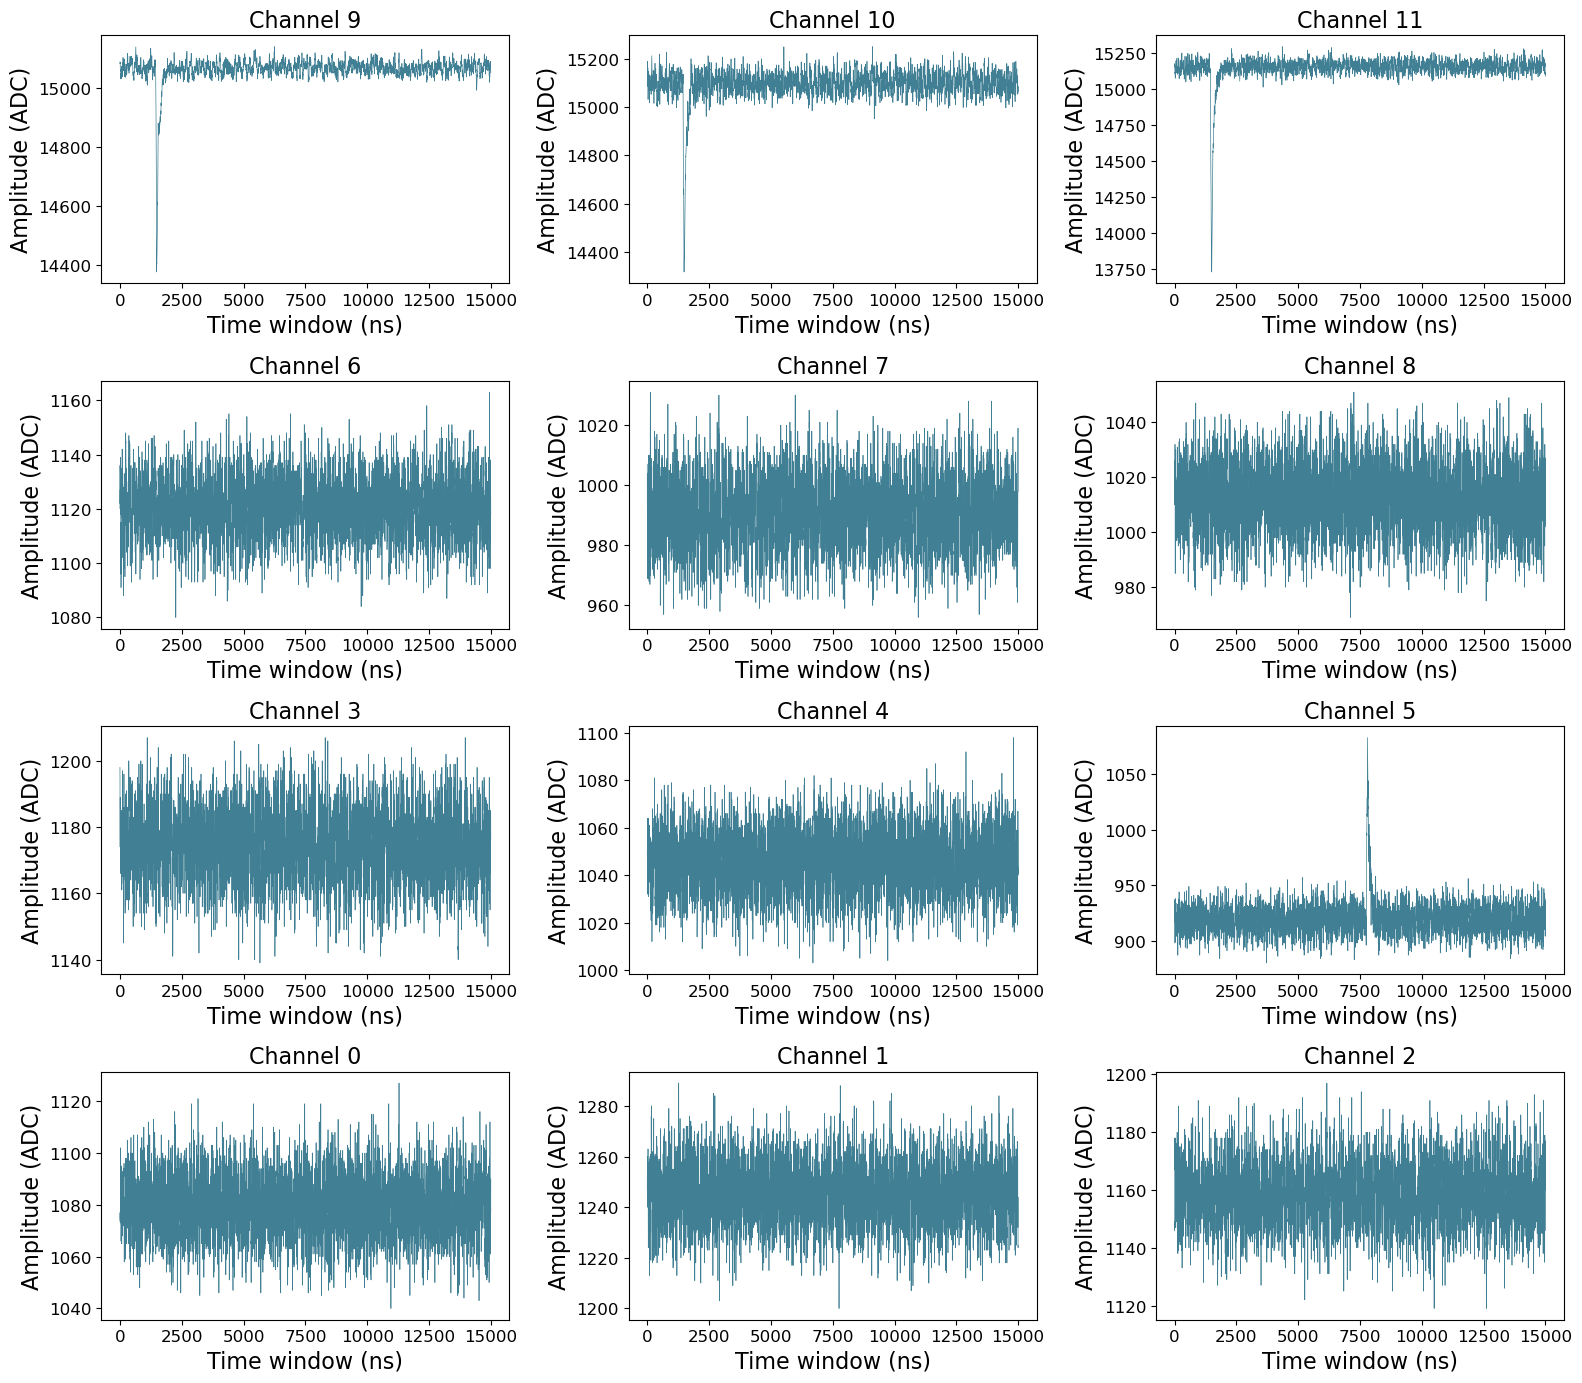

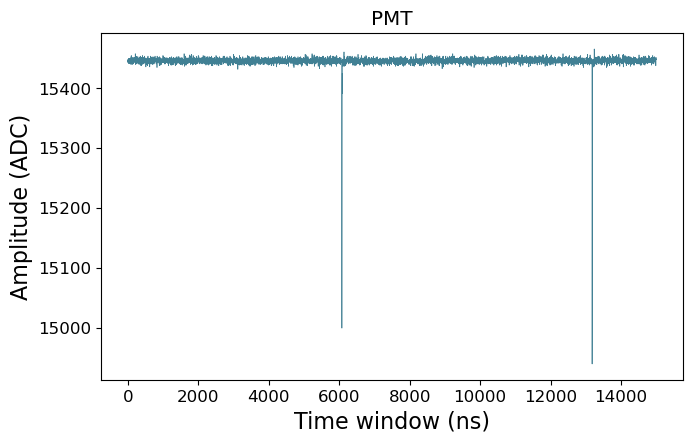

In [269]:
choose_evt = 201 #5716 # 591 #523, 121
fig, axs   = plt.subplots(4, 3, figsize=(16, 14))
for row, ich in enumerate(reversed(np.arange(0, 12, 3))):
    for col in range(3):
        ch = ich + col
        wf0  = np.array(RawTree[f'chan{ch}/rdigi'].array())[choose_evt]
        swf0 = pf.subtract_baseline(wf0, mode=True, wf_range_bsl=(0, 500))
        wf1  = np.array(RawTree[f'chan12/rdigi'].array())[choose_evt]
        swf1 = pf.subtract_baseline(wf1, mode=True, wf_range_bsl=(0, 500))
        axs[row][col].plot(2*np.arange(len(wf0)), wf0, linewidth=0.5, color=fav_col)
        #axs[row][col].plot(2*np.arange(len(swf0)), swf0, linewidth=0.5, color=fav_col,     alpha=0.9)
        #axs[row][col].plot(2*np.arange(len(swf1)), swf1, linewidth=0.5, color='indianred', alpha=0.9, label='PMT')
        axs[row][col].set_xlabel('Time window (ns)', fontsize=16)
        axs[row][col].set_ylabel('Amplitude (ADC)',  fontsize=16)
        axs[row][col].set_title(f"Channel {ch}",     fontsize=16)
        #axs[row][col].legend()
plt.tight_layout()
plt.show()


wf0  = np.array(RawTree[f'chan12/rdigi'].array())[choose_evt]
plt.plot(2*np.arange(len(wf0)), wf0, linewidth=0.5, color=fav_col)
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADC)',  fontsize=16)
plt.title('PMT')
plt.show()

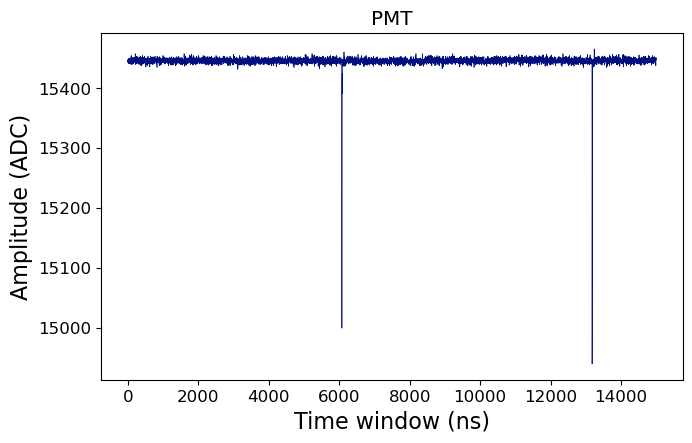

In [196]:
wf0  = np.array(RawTree[f'chan12/rdigi'].array())[choose_evt]
plt.plot(2*np.arange(len(wf0)), wf0, linewidth=0.5, color='#000F7E')
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADC)',  fontsize=16)
plt.title('PMT')
plt.show()

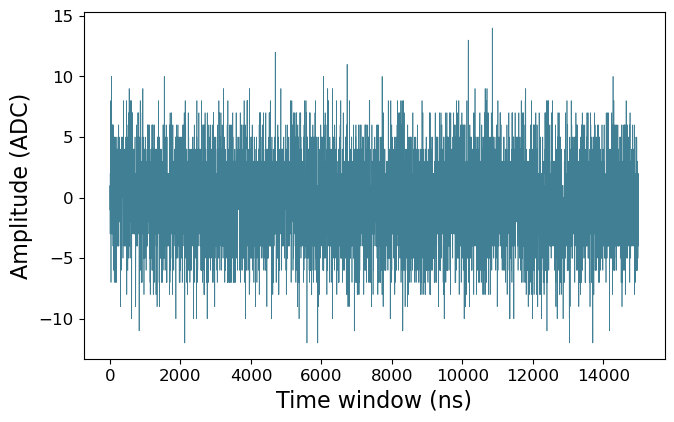

In [170]:
wf0  = np.array(RawTree[f'chan12/rdigi'].array())[choose_evt]
swf0 = pf.subtract_baseline(wf0, mode=True, wf_range_bsl=(0, 500))
plt.plot(2*np.arange(len(swf0)), swf0, linewidth=0.5, color=fav_col)
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADC)',  fontsize=16)
plt.show()

In [180]:
all_stds = np.array([np.std(np.array(RawTree[f'chan{ch}/rdigi'].array()), axis=0) for ch in [0, 1, 2, 3, 4, 5, 6, 7, 8, 12]])

In [190]:
for i, el in enumerate(all_stds.T[500:1000]):
    num_peaks = len(np.where(el>13)[0])
    if num_peaks>3:
        print(i, num_peaks)

199 4
200 5
201 5
202 6
203 6
204 7
205 9
206 9
207 9
208 9
209 9
210 9
211 9
212 9
213 9
214 9
215 9
216 10
217 10
218 10
219 9
220 9
221 9
222 9
223 10
224 10
225 10
226 10
227 10
228 10
229 10
230 10
231 10
232 10
233 10
234 10
235 10
236 10
237 10
238 10
239 10
240 10
241 10
242 10
243 10
244 10
245 10
246 10
247 10
248 10
249 10
250 10
251 10
252 10
253 10
254 10
255 10
256 10
257 10
258 10
259 10
260 10
261 10
262 10
263 10
264 10
265 10
266 10
267 10
268 10
269 10
270 10
271 10
272 10
273 10
274 10
275 10
276 10
277 10
278 10
279 10
280 10
281 10
282 10
283 10
284 10
285 10
286 10
287 10
288 10
289 10
290 10
291 10
292 10
293 10
294 10
295 10
296 10
297 10
298 10
299 10
300 10
301 10
302 10
303 10
304 10
305 10
306 10
307 10
308 10
309 10
310 10
311 10
312 10
313 10
314 10
315 10
316 10
317 10
318 10
319 10
320 10
321 10
322 10
323 10
324 10
325 10
326 10
327 10
328 10
329 10
330 10
331 10
332 10
333 10
334 10
335 10
336 10
337 10
338 10
339 10
340 10
341 10
342 10
343 10
344 10

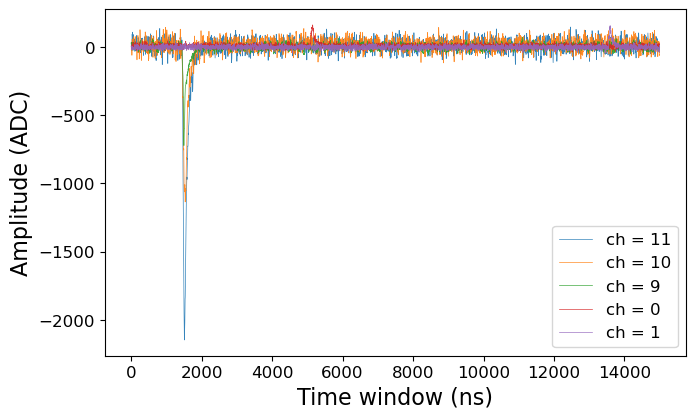

In [45]:
for ch in [11, 10, 9, 0, 1]:
    wf0  = np.array(RawTree[f'chan{ch}/rdigi'].array())[choose_evt]
    swf0 = pf.subtract_baseline(wf0, mode=True, wf_range_bsl=(0, 500))
    plt.plot(2*np.arange(len(swf0)), swf0, linewidth=0.5, alpha=0.9, label=f'ch = {ch}')
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADC)',  fontsize=16)
plt.legend()
plt.show()

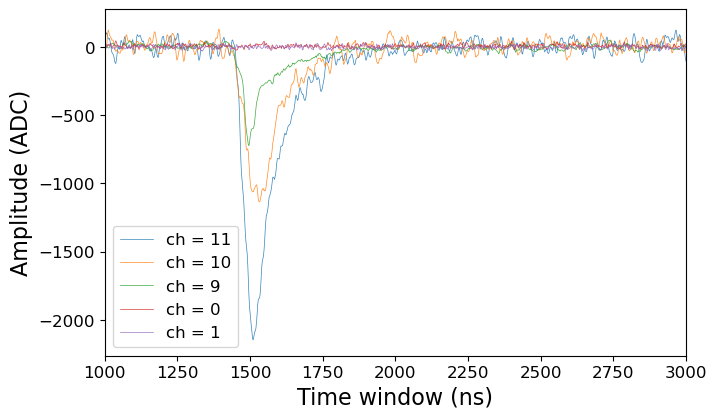

In [46]:
for ch in [11, 10, 9, 0, 1]:
    wf0  = np.array(RawTree[f'chan{ch}/rdigi'].array())[choose_evt]
    swf0 = pf.subtract_baseline(wf0, mode=True, wf_range_bsl=(0, 500))
    plt.plot(2*np.arange(len(swf0)), swf0, linewidth=0.5, alpha=0.9, label=f'ch = {ch}')
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADC)',  fontsize=16)
plt.legend()
plt.xlim(1000, 3000)
plt.show()

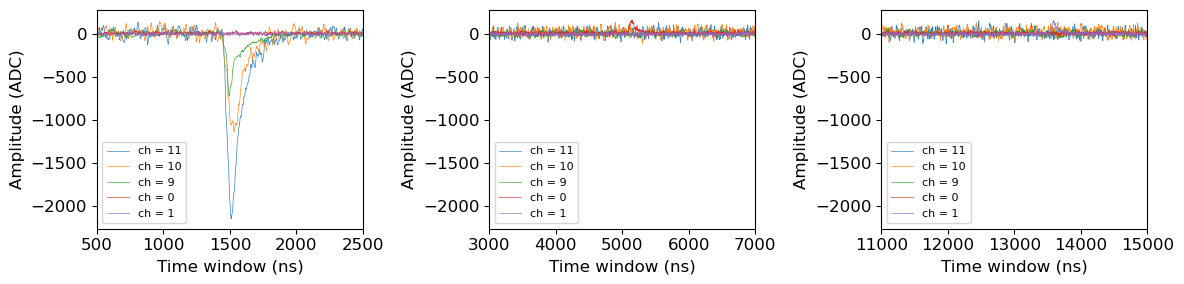

In [53]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 3))
for ch in [11, 10, 9, 0, 1]:
    wf0  = np.array(RawTree[f'chan{ch}/rdigi'].array())[choose_evt]
    swf0 = pf.subtract_baseline(wf0, mode=True, wf_range_bsl=(0, 500))
    for ax in [ax0, ax1, ax2]:
        ax.plot(2*np.arange(len(swf0)), swf0, linewidth=0.5, alpha=0.9, label=f'ch = {ch}')
        ax.set_xlabel('Time window (ns)')
        ax.set_ylabel('Amplitude (ADC)')
        ax.legend(fontsize=8)
ax0.set_xlim(  500,  2500)
ax1.set_xlim( 3000,  7000)
ax2.set_xlim(11000, 15000)
plt.tight_layout()
plt.show()

## Load analyzed data:

In [254]:
trigger_chs = [9, 10, 11]

thr_ADC        = 50
sg_filt_window = 30
min_dist       = 15

def extract_date_and_number(filename):
    match = re.search(r"(\d{2}_\d{2}_\d{4})-file_(\d+)", filename)
    return match.group(1), int(match.group(2))

def adapt_evt_id(evt_id, fnum):
    return 100000*fnum + np.array(evt_id)

evts_path  = '/Users/romoluque_c/LEGEND/BACON/new_setup/data_npz_run3/'
files      = os.listdir(evts_path)
filt_files = sorted(glob.glob(evts_path + f'/BACoN_run3_hits_and_times_thr{thr_ADC}_w{sg_filt_window}_dist{min_dist}_run-*'), key=extract_date_and_number)

In [101]:
filt_evts_all          = {}
idx_peak_thr_all       = {}
h_peak_sg_d_all        = {}
idx_peak_thr_trigg_all = {}
h_peak_sg_d_trigg_all  = {}

normal_chs = range(9)

filt_files0 = [file for file in filt_files if '10_17_2024' in file]
for filename in filt_files0[:10]:
    d          = np.load(filename, allow_pickle=True)
    date, fnum = extract_date_and_number(filename)
    print(date, fnum)

    if date not in filt_evts_all:
        filt_evts_all   [date] = {ch: d['filt_evts_dict']                .item()[ch] for ch in normal_chs}
        idx_peak_thr_all[date] = {ch: d['idx_peaks_thr_ch_dict']         .item()[ch] for ch in normal_chs}
        h_peak_sg_d_all [date] = {ch: d['height_peaks_sg_deconv_ch_dict'].item()[ch] for ch in normal_chs}

        idx_peak_thr_trigg_all[date] = {ch: d['idx_peaks_thr_ch_trigg_dict']         .item()[ch] for ch in trigger_chs}
        h_peak_sg_d_trigg_all [date] = {ch: d['height_peaks_sg_deconv_ch_trigg_dict'].item()[ch] for ch in trigger_chs}
        continue

    for ch in normal_chs:
        try:
            filt_evts_all   [date][ch] = np.concatenate((filt_evts_all   [date][ch], adapt_evt_id(d['filt_evts_dict'].item()[ch], fnum)))
            idx_peak_thr_all[date][ch] = np.concatenate((idx_peak_thr_all[date][ch], d['idx_peaks_thr_ch_dict']         .item()[ch]))
            h_peak_sg_d_all [date][ch] = np.concatenate((h_peak_sg_d_all [date][ch], d['height_peaks_sg_deconv_ch_dict'].item()[ch]))
        
        except Exception as e:
            print(date, fnum, filename, ch, str(e))
            continue

    for ch in trigger_chs:
        idx_peak_thr_trigg_all[date][ch] = np.concatenate((idx_peak_thr_trigg_all[date][ch], d['idx_peaks_thr_ch_trigg_dict']         .item()[ch]))
        h_peak_sg_d_trigg_all [date][ch] = np.concatenate((h_peak_sg_d_trigg_all [date][ch], d['height_peaks_sg_deconv_ch_trigg_dict'].item()[ch]))

10_17_2024 0
10_17_2024 1
10_17_2024 2
10_17_2024 3
10_17_2024 4
10_17_2024 5
10_17_2024 6
10_17_2024 7
10_17_2024 8
10_17_2024 9


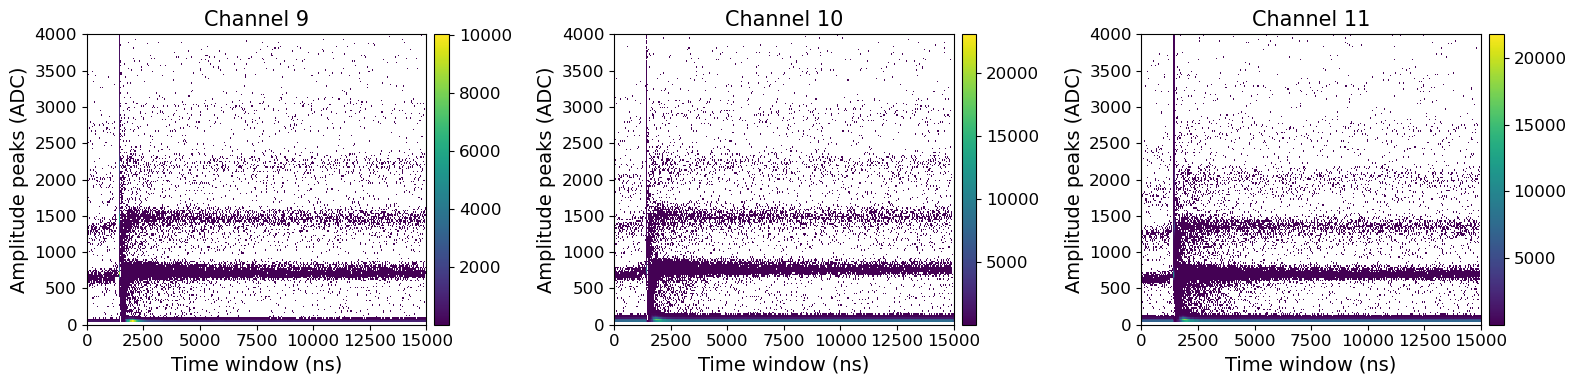

In [105]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for k in [9, 10, 11]:
    j = k%3

    ch_idxs = np.concatenate(([np.concatenate((idx_peak_thr_trigg_all[date][k])) for date in idx_peak_thr_trigg_all.keys()]))
    ch_vals = np.concatenate(([np.concatenate((h_peak_sg_d_trigg_all [date][k])) for date in idx_peak_thr_trigg_all.keys()]))
    
    fig0 = axs[j].hist2d(ch_idxs*2, ch_vals, bins=(500, 200), range=((0, 15000), (0, 4000)), cmin=1)
    axs[j].set_xlabel('Time window (ns)',      fontsize=14)
    axs[j].set_ylabel('Amplitude peaks (ADC)', fontsize=14)
    axs[j].set_title(f"Channel {k}",           fontsize=15)
    fig.colorbar(fig0[3], ax=axs[j], pad=0.02)
plt.tight_layout()
plt.show()

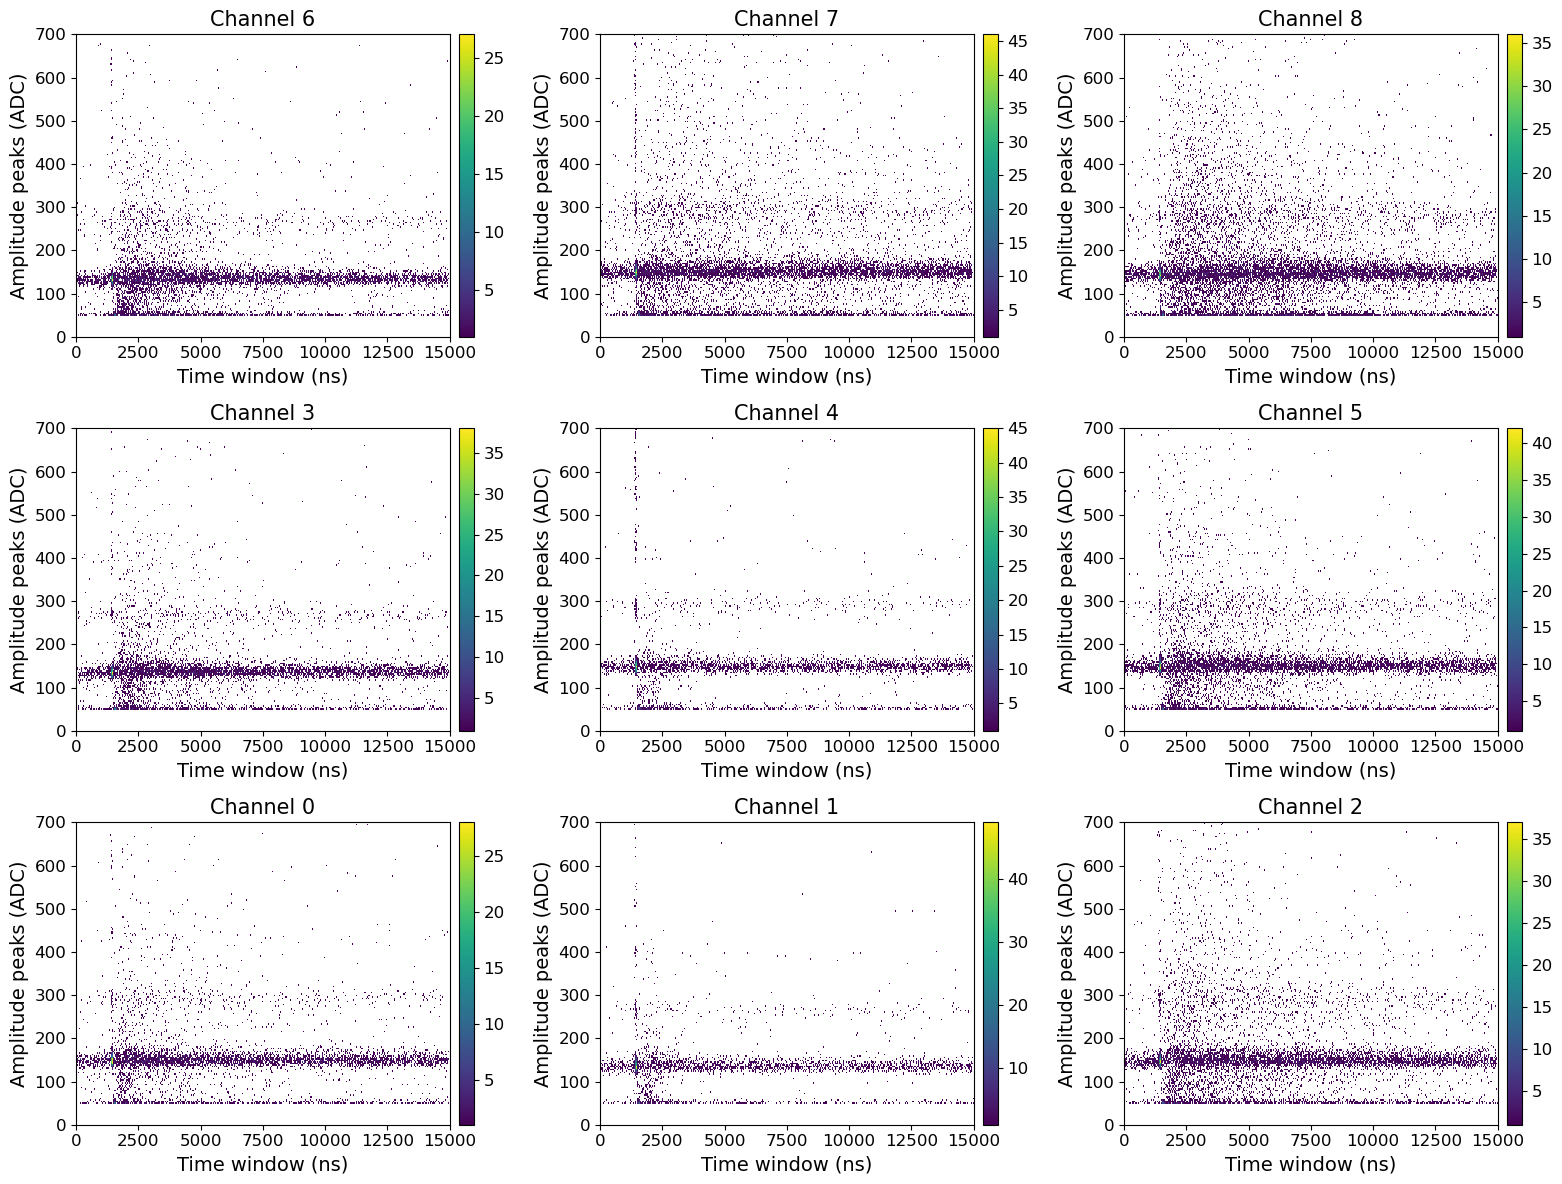

In [112]:
fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for row, ich in enumerate(reversed(np.arange(0, 9, 3))):
    for col in range(3):
        ch = ich + col

        ch_idxs = np.concatenate(([np.concatenate((idx_peak_thr_all[date][ch])) for date in idx_peak_thr_all.keys()]))
        ch_vals = np.concatenate(([np.concatenate((h_peak_sg_d_all [date][ch])) for date in idx_peak_thr_all.keys()]))
    
        fig0 = axs[row][col].hist2d(ch_idxs*2, ch_vals, bins=(500, 200), range=((0, 15000), (0, 700)), cmin=1)
        axs[row][col].set_xlabel('Time window (ns)',      fontsize=14)
        axs[row][col].set_ylabel('Amplitude peaks (ADC)', fontsize=14)
        axs[row][col].set_title(f"Channel {ch}",           fontsize=15)
        fig.colorbar(fig0[3], ax=axs[row][col], pad=0.02)
plt.tight_layout()
plt.show()

### Remove pre trigger events and high light

In [264]:
idx_peak_thr_pretrigg_and_hl_cut       = {}
h_peak_sg_d_pretrigg_and_hl_cut        = {}
num_evts_ch_pretrigg_and_hl_cut        = {}
idx_peak_thr_trigg_pretrigg_and_hl_cut = {}
h_peak_sg_d_trigg_pretrigg_and_hl_cut  = {}
num_evts_ch_trigg_pretrigg_and_hl_cut  = {}

print(len(filt_files0))
for ifile,filename in enumerate(filt_files0[:10]):
    if ifile%20==0:
        print(ifile)
    d          = np.load(filename, allow_pickle=True)
    date, fnum = extract_date_and_number(filename)

    #print(date, fnum)
    for ch in normal_chs:
        idx_peaks_ch_after_cut    = []
        height_peaks_ch_after_cut = []
        events_ch_after_cut       = []
        num_evts                  = 0
        idx_peaks_ch    = d['idx_peaks_thr_ch_dict']         .item()[ch]
        height_peaks_ch = d['height_peaks_sg_deconv_ch_dict'].item()[ch]
        filt_evts_ch    = adapt_evt_id(d['filt_evts_dict']   .item()[ch], fnum)
        for idxs, vals, f_evt in zip(idx_peaks_ch, height_peaks_ch, filt_evts_ch):
            if len(idxs)==0:
                continue
            noise_evts = (np.array(idxs)<650)&(np.array(vals)>100) ## Threshold for normal channels
            if np.any(noise_evts):
                continue
            elif np.any(np.array(vals) > 500):
                continue
            else:
                idx_peaks_ch_after_cut   .append(idxs)
                height_peaks_ch_after_cut.append(vals)
                events_ch_after_cut      .append(f_evt)
                
        if date not in idx_peak_thr_pretrigg_and_hl_cut:
            print(date)
            idx_peak_thr_pretrigg_and_hl_cut[date] = {}
            h_peak_sg_d_pretrigg_and_hl_cut [date] = {}
            num_evts_ch_pretrigg_and_hl_cut [date] = {}

        if ch not in idx_peak_thr_pretrigg_and_hl_cut[date]:
            try:
                idx_peak_thr_pretrigg_and_hl_cut[date][ch] = np.array(idx_peaks_ch_after_cut)
                h_peak_sg_d_pretrigg_and_hl_cut [date][ch] = np.array(height_peaks_ch_after_cut)
                num_evts_ch_pretrigg_and_hl_cut [date][ch] = np.array(events_ch_after_cut)
            except Exception as e:
                print(e)
                continue
        else:
            try:
                idx_peak_thr_pretrigg_and_hl_cut[date][ch] = np.concatenate((idx_peak_thr_pretrigg_and_hl_cut[date][ch], np.array(idx_peaks_ch_after_cut)))
                h_peak_sg_d_pretrigg_and_hl_cut [date][ch] = np.concatenate((h_peak_sg_d_pretrigg_and_hl_cut [date][ch], np.array(height_peaks_ch_after_cut)))
                num_evts_ch_pretrigg_and_hl_cut [date][ch] = np.concatenate((num_evts_ch_pretrigg_and_hl_cut [date][ch], np.array(events_ch_after_cut)))
            except Exception as e:
                print(e)
                continue
        
        
    for ch in trigger_chs:
        idx_peaks_ch_after_cut    = []
        height_peaks_ch_after_cut = []
        num_evts                  = []
        idx_peaks_ch    = d['idx_peaks_thr_ch_trigg_dict']         .item()[ch]
        height_peaks_ch = d['height_peaks_sg_deconv_ch_trigg_dict'].item()[ch]
        for ievt, (idxs, vals) in enumerate(zip(idx_peaks_ch, height_peaks_ch)):
            if len(idxs)==0:
                continue
            noise_evts = (np.array(idxs)<650)&(np.array(vals)>300) ## Threshold for trigger channels
            if np.any(noise_evts):
                continue
            else:
                idx_peaks_ch_after_cut   .append(idxs)
                height_peaks_ch_after_cut.append(vals)
                num_evts                 .append(adapt_evt_id(ievt, fnum))
                
        if date not in idx_peak_thr_trigg_pretrigg_and_hl_cut:
            idx_peak_thr_trigg_pretrigg_and_hl_cut[date] = {}
            h_peak_sg_d_trigg_pretrigg_and_hl_cut [date] = {}
            num_evts_ch_trigg_pretrigg_and_hl_cut [date] = {}
    
        if ch not in idx_peak_thr_trigg_pretrigg_and_hl_cut[date]:
            try:
                idx_peak_thr_trigg_pretrigg_and_hl_cut[date][ch] = np.array(idx_peaks_ch_after_cut)
                h_peak_sg_d_trigg_pretrigg_and_hl_cut [date][ch] = np.array(height_peaks_ch_after_cut)
                num_evts_ch_trigg_pretrigg_and_hl_cut [date][ch] = np.array(num_evts)
            except Exception as e:
                print(e)
                continue
        else:
            try:
                idx_peak_thr_trigg_pretrigg_and_hl_cut[date][ch] = np.concatenate((idx_peak_thr_trigg_pretrigg_and_hl_cut[date][ch], np.array(idx_peaks_ch_after_cut)))
                h_peak_sg_d_trigg_pretrigg_and_hl_cut [date][ch] = np.concatenate((h_peak_sg_d_trigg_pretrigg_and_hl_cut [date][ch], np.array(height_peaks_ch_after_cut)))
                num_evts_ch_trigg_pretrigg_and_hl_cut [date][ch] = np.concatenate((num_evts_ch_trigg_pretrigg_and_hl_cut [date][ch], np.array(num_evts)))
            except Exception as e:
                print(e)
                continue

104
0
10_17_2024


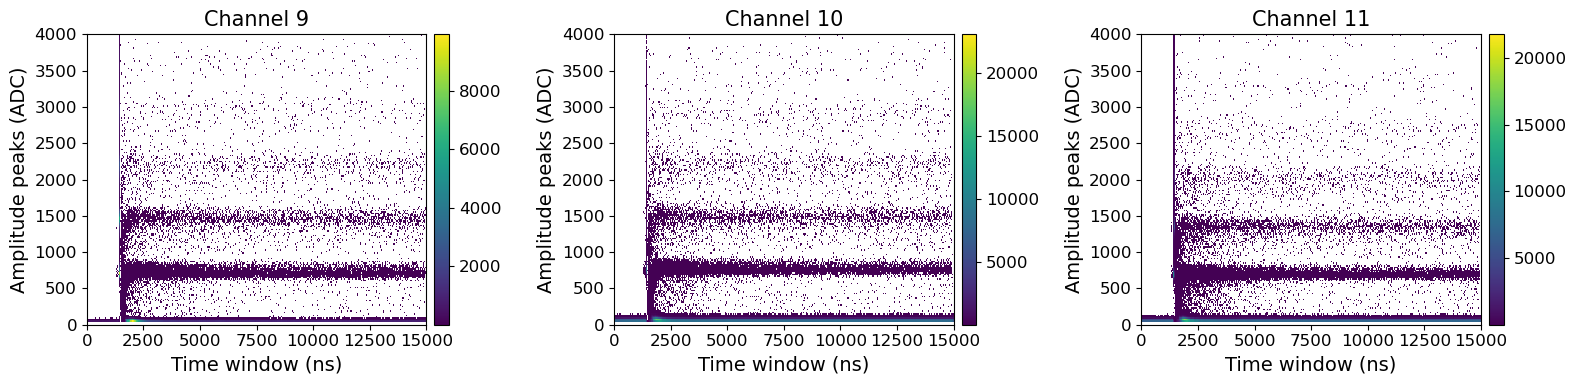

In [124]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for k in [9, 10, 11]:
    j = k%3

    ch_idxs = np.concatenate(([np.concatenate((idx_peak_thr_trigg_pretrigg_and_hl_cut[date][k])) for date in idx_peak_thr_trigg_pretrigg_and_hl_cut.keys()]))
    ch_vals = np.concatenate(([np.concatenate((h_peak_sg_d_trigg_pretrigg_and_hl_cut [date][k])) for date in idx_peak_thr_trigg_pretrigg_and_hl_cut.keys()]))
    
    fig0 = axs[j].hist2d(ch_idxs*2, ch_vals, bins=(500, 200), range=((0, 15000), (0, 4000)), cmin=1)
    axs[j].set_xlabel('Time window (ns)',      fontsize=14)
    axs[j].set_ylabel('Amplitude peaks (ADC)', fontsize=14)
    axs[j].set_title(f"Channel {k}",           fontsize=15)
    fig.colorbar(fig0[3], ax=axs[j], pad=0.02)
plt.tight_layout()
plt.show()

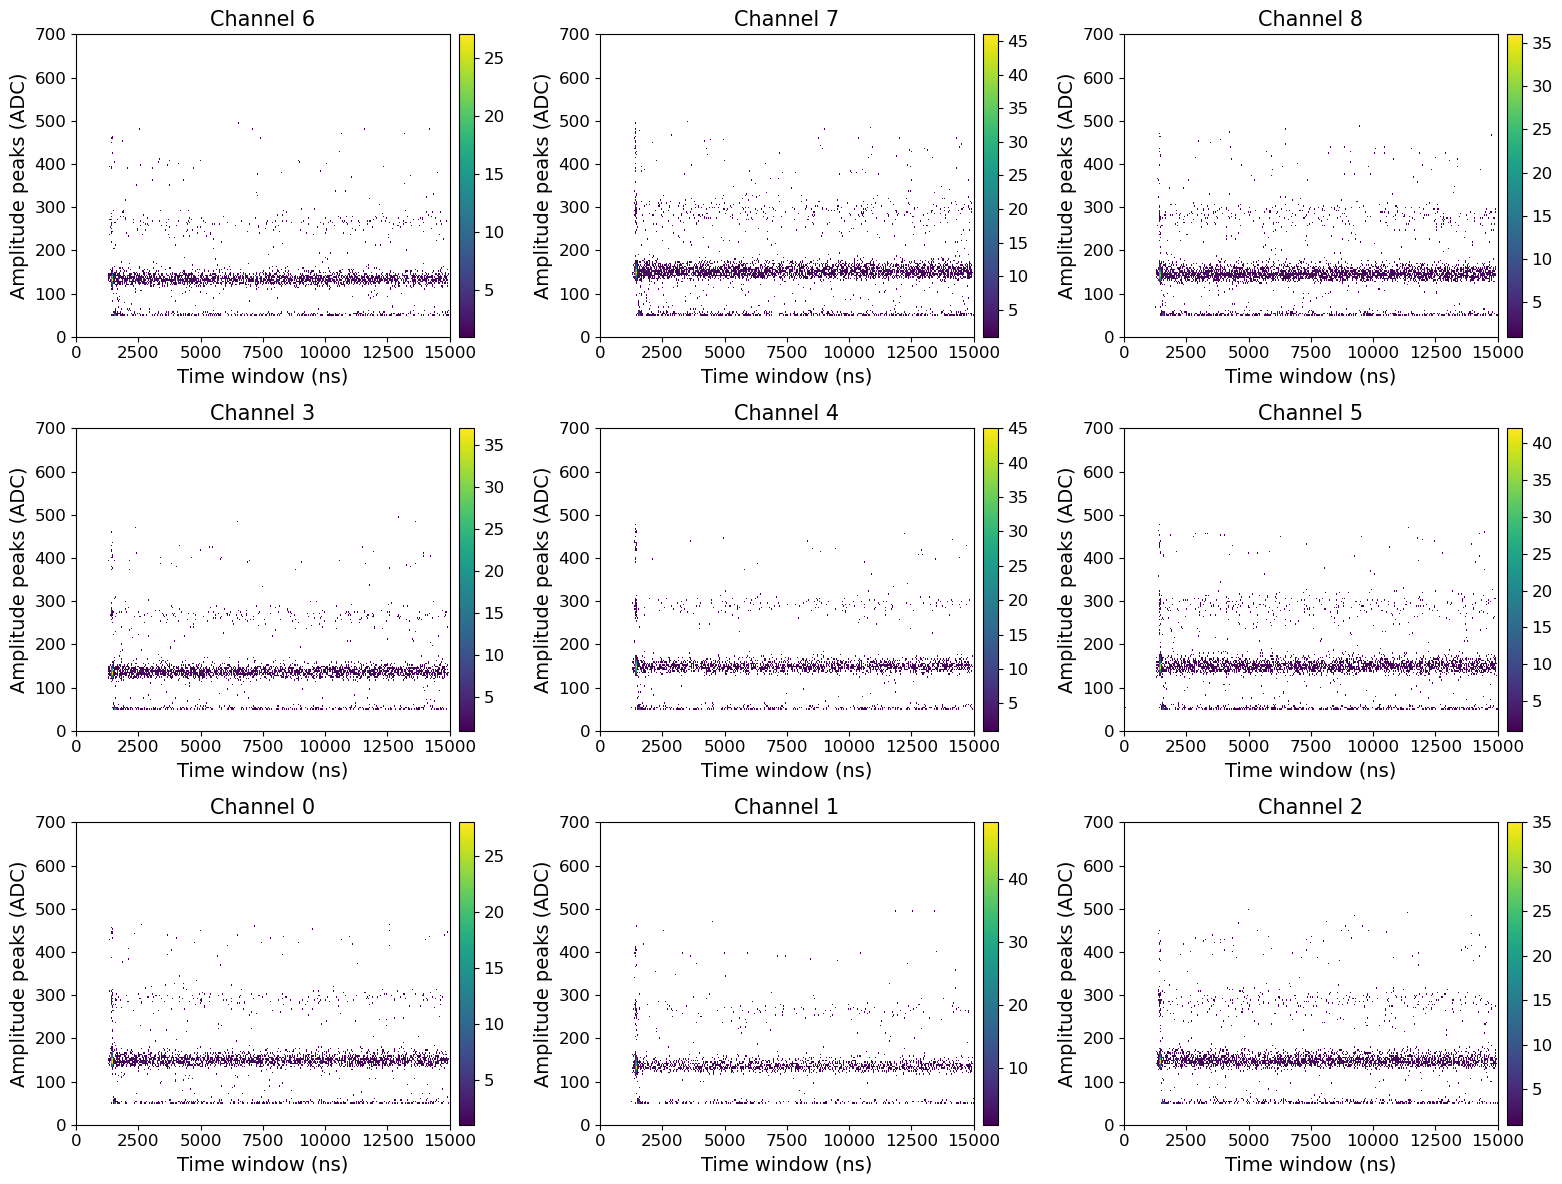

In [123]:
fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for row, ich in enumerate(reversed(np.arange(0, 9, 3))):
    for col in range(3):
        ch = ich + col

        ch_idxs = np.concatenate(([np.concatenate((idx_peak_thr_pretrigg_and_hl_cut[date][ch])) for date in idx_peak_thr_pretrigg_and_hl_cut.keys()]))
        ch_vals = np.concatenate(([np.concatenate((h_peak_sg_d_pretrigg_and_hl_cut [date][ch])) for date in idx_peak_thr_pretrigg_and_hl_cut.keys()]))
    
        fig0 = axs[row][col].hist2d(ch_idxs*2, ch_vals, bins=(500, 200), range=((0, 15000), (0, 700)), cmin=1)
        axs[row][col].set_xlabel('Time window (ns)',      fontsize=14)
        axs[row][col].set_ylabel('Amplitude peaks (ADC)', fontsize=14)
        axs[row][col].set_title(f"Channel {ch}",          fontsize=15)
        fig.colorbar(fig0[3], ax=axs[row][col], pad=0.02)
plt.tight_layout()
plt.show()

## Look for the range where the trigger pulse happens in the trigger channels:

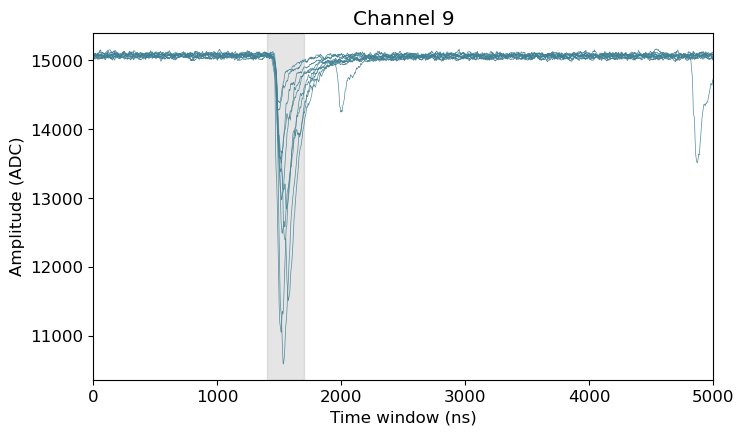

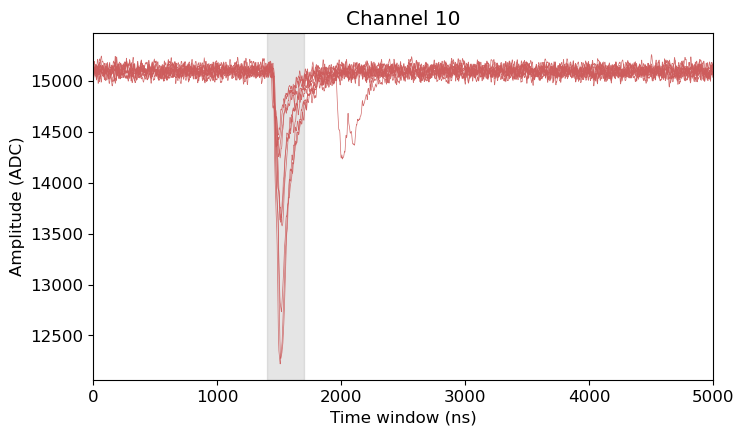

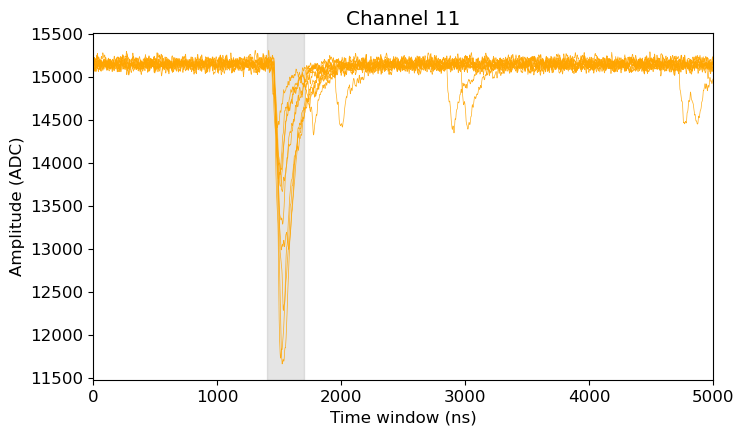

In [138]:
for ch, c in zip([9, 10, 11], [fav_col, 'indianred', 'orange']):
    plt.figure(figsize=(8, 4.5))
    wfs  = np.array(RawTree[f'chan{ch}/rdigi'].array())
    for wf in wfs[:10]:
        plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5, alpha=0.9, color=c)
    plt.axvspan(1400, 1700, color='grey', alpha=0.2)
    plt.xlabel('Time window (ns)')
    plt.ylabel('Amplitude (ADC)')
    plt.title(f'Channel {ch}')
    plt.xlim(0, 5000)
    plt.show()

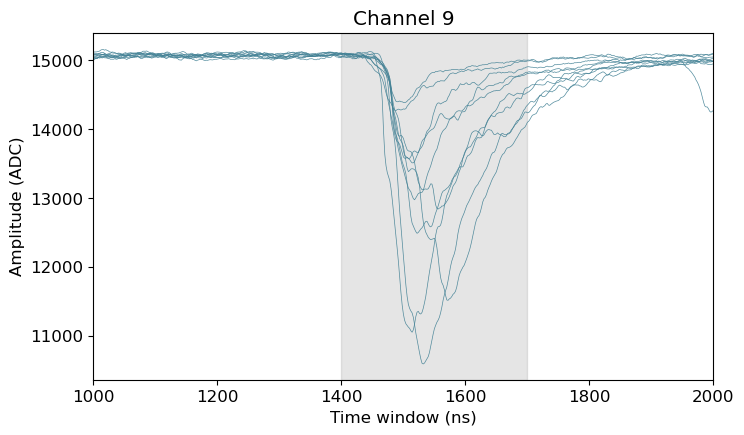

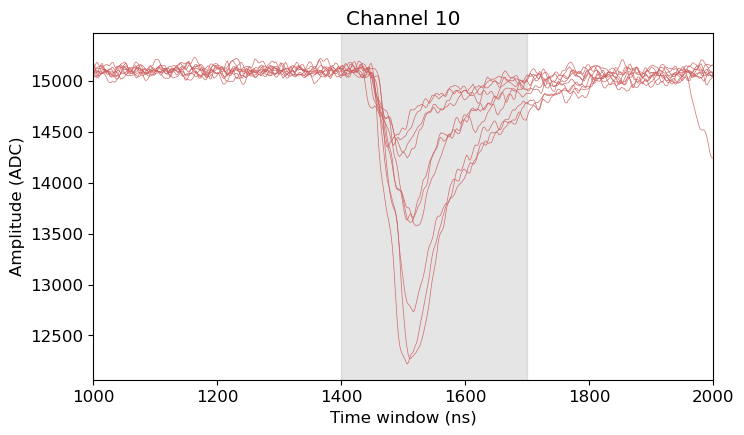

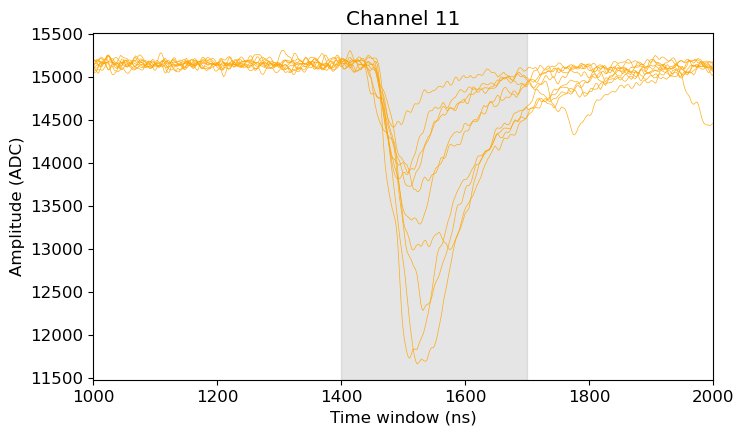

In [267]:
for ch, c in zip([9, 10, 11], [fav_col, 'indianred', 'orange']):
    plt.figure(figsize=(8, 4.5))
    wfs  = np.array(RawTree[f'chan{ch}/rdigi'].array())
    for wf in wfs[:10]:
        plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5, alpha=0.9, color=c)
    plt.axvspan(1400, 1700, color='grey', alpha=0.2)
    plt.xlabel('Time window (ns)')
    plt.ylabel('Amplitude (ADC)')
    plt.title(f'Channel {ch}')
    plt.xlim(1000, 2000)
    plt.show()

In [ ]:
idx_peak_thr_pretrigg_and_hl_cut
h_peak_sg_d_pretrigg_and_hl_cut
num_evts_ch_pretrigg_and_hl_cut
idx_peak_thr_trigg_pretrigg_and_hl_cut
h_peak_sg_d_trigg_pretrigg_and_hl_cut
num_evts_ch_trigg_pretrigg_and_hl_cut

In [265]:
date = '10_17_2024'
normal_ch_evts = np.unique(np.concatenate(list(num_evts_ch_pretrigg_and_hl_cut[date].values())))

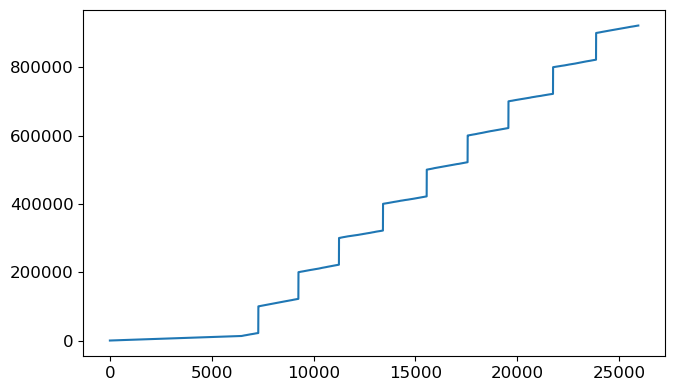

In [266]:
plt.plot(normal_ch_evts)

In [257]:
for evt in normal_ch_evts[:4]:
    print(evt)
    for ch in range(9):
        #print(evt, ch)
        if evt in num_evts_ch_pretrigg_and_hl_cut[date][ch]:
            print(evt, ch, np.where(num_evts_ch_pretrigg_and_hl_cut[date][ch]==evt)[0][0])
            #print(idx_peak_thr_pretrigg_and_hl_cut[date][ch][np.where(num_evts_ch_pretrigg_and_hl_cut[date][ch]==evt)[0][0]])

0
0 2 0
0 6 0
0 8 0
1
1 3 0
2
2 7 0
3
3 2 1
3 6 1


In [252]:
np.where(num_evts_ch_pretrigg_and_hl_cut['10_17_2024'][7]==1)

(array([], dtype=int64),)

In [253]:
num_evts_ch_pretrigg_and_hl_cut['10_17_2024'][7][1255:1265]

array([  21897,   21929,   21962,   21966, 1000001, 1000043, 1000141,
       1000246, 1000380, 1000485])

In [241]:
from collections import Counter

#all_evts = np.concatenate(list(filt_evts_all['10_17_2024'].values()))
all_evts = np.concatenate(list(num_evts_ch_pretrigg_and_hl_cut['10_17_2024'].values()))
all_evts = np.array([evt for evt in all_evts if evt not in [121, 523]])
counts   = Counter(all_evts)

most_common_number, frequency = counts.most_common(1)[0]
#print(most_common_number, frequency)
#counts.most_common(100)